<a href="https://colab.research.google.com/github/Srikantan0/Mini-Project/blob/main/Image_Classification_Using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Data(input)
#using bing_image_downloader
!pip install bing_image_downloader

In [2]:
!mkdir images

In [3]:
!pip install ipython-autotime
%load_ext autotime

time: 143 µs (started: 2021-05-23 13:35:25 +00:00)


In [4]:
#now preprocessing
#resize and then flatten
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
import os

target = []
images = []
flat_data = []

datadir = '/content/drive/MyDrive/datasetForClassification'
categories = ['crow','owl','pigeon']

for i in categories:
  class_num = categories.index(i) #label for values 
  path = os.path.join(datadir,i)  #path creation to use
  for img in os.listdir(path):
    img_arr = imread(os.path.join(path,img))
    #print(img_arr)
    #plt.imshow(img_arr)
    img_resized = resize(img_arr,(150,150,3))  #normalized
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

target = np.array(target)
images = np.array(images)
flat_data = np.array(flat_data)

time: 28.1 s (started: 2021-05-23 13:35:25 +00:00)


In [5]:
len(flat_data[0])

67500

time: 6.43 ms (started: 2021-05-23 13:35:53 +00:00)


<BarContainer object of 3 artists>

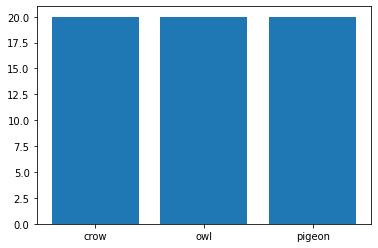

time: 164 ms (started: 2021-05-23 13:35:53 +00:00)


In [6]:
uni, count = np.unique(target,return_counts = True)
plt.bar(categories,count)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(flat_data,target,test_size = 0.3,random_state=42)

time: 187 ms (started: 2021-05-23 13:35:53 +00:00)


In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C' : [1,10,100,1000], 'kernel':['linear']},
              {'C' : [1,10,100,1000],'gamma':[0.001,0.0001], 'kernel':['rbf']}
]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 55.3 s (started: 2021-05-23 13:35:53 +00:00)


In [9]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 1])

time: 91.9 ms (started: 2021-05-23 13:36:49 +00:00)


In [10]:
y_test

array([0, 0, 1, 2, 0, 2, 1, 2, 0, 2, 2, 2, 1, 0, 2, 0, 0, 0])

time: 5.51 ms (started: 2021-05-23 13:36:49 +00:00)


In [11]:
from sklearn.metrics import accuracy_score,confusion_matrix


time: 1.34 ms (started: 2021-05-23 13:36:49 +00:00)


In [12]:
accuracy_score(y_test,y_pred)

0.5

time: 5.02 ms (started: 2021-05-23 13:36:49 +00:00)


In [13]:

confusion_matrix(y_pred,y_test)

array([[5, 0, 4],
       [1, 2, 1],
       [2, 1, 2]])

time: 7.95 ms (started: 2021-05-23 13:36:49 +00:00)


In [14]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 37 ms (started: 2021-05-23 13:36:49 +00:00)


In [15]:
model = pickle.load(open('img_model.p','rb'))


time: 15.8 ms (started: 2021-05-23 13:36:49 +00:00)


Enter your image urlhttps://www.gannett-cdn.com/-mm-/f3e3996cd5aa1c19b5b2eed038273e991e055c42/c=0-243-1409-2122/local/-/media/2015/11/18/CNYGroup/Ithaca/635834677390403113-Great-Horned-Owl.jpg?width=660&height=881&fit=crop&format=pjpg&auto=webp
(881, 660, 3)
INPUT BEST RESEMBLES : pigeon


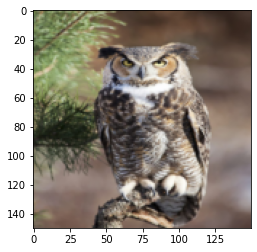

time: 46.8 s (started: 2021-05-23 13:36:49 +00:00)


In [16]:
flat_data = []
url = input('Enter your image url')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = categories[y_out[0]]
print(f'INPUT BEST RESEMBLES : {y_out}')

In [17]:
!pip install streamlit 
!pip install pyngrok
from pyngrok import ngrok

     |████████████████████████████████| 8.2MB 5.8MB/s 
     |████████████████████████████████| 4.2MB 36.0MB/s 
     |████████████████████████████████| 81kB 8.9MB/s 
     |████████████████████████████████| 174kB 55.1MB/s 
     |████████████████████████████████| 92kB 10.0MB/s 
     |████████████████████████████████| 112kB 54.7MB/s 
     |████████████████████████████████| 122kB 44.4MB/s 
     |████████████████████████████████| 71kB 7.9MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13448 sha256=dfb6c9e5ab9de50c3997f4c1ba1ec33ebb66e6f46ef38ed9ceb0ff58134ad714
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1
  Found existing installatio

     |████████████████████████████████| 747kB 6.3MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.5-cp37-none-any.whl size=19246 sha256=323331599f0740699c5fe8934767ba880ca93505591c368c984cbbc114a4b3d6
  Stored in directory: /root/.cache/pip/wheels/0c/13/64/5ebbcc22eaf53fdf5766b397c1fb17c83f5775fdccf0ea1b88
Successfully built pyngrok
time: 18.5 s (started: 2021-05-23 13:37:36 +00:00)


In [27]:
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image
st.title('IMAGE CLASSIFIER BY MACHINE LEARNING')
st.text('Upload an image: ')

model = pickle.load(open('img_model.p','rb'))

uploaded_file = st.file_uploader('choose image  ', type='jpg')
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption="UPLOADED PHOTO")
  if st.button('PREDICT THE BIRD'):
    categories = ['crow','owl','pigeon']
    st.write('answer...')
    flat_data=[]
    img = np.array(img)
    img_resized = resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    print(img.shape)
    y_out = model.predict(flat_data)
    y_out = categories[y_out[0]]
    st.write(f'INPUT BEST RESEMBLES : {y_out}')
    q  =model.predict_proba(flat_data)
    for index,item in enumerate(categories):
          st.write(f'MATCH for {item} : {q[0][index]*100 %}')


Overwriting app.py
time: 2.4 ms (started: 2021-05-23 13:57:08 +00:00)


In [19]:
!nohup streamlit run --server.port 80 app.py&

url = ngrok.connect(port='8501')
url


nohup: appending output to 'nohup.out'


<NgrokTunnel: "http://f04d877f46d4.ngrok.io" -> "http://localhost:80">

time: 1.65 s (started: 2021-05-23 13:37:54 +00:00)
